# EDSA Apple Prices Challenge
### By Team:Regression_AE7_DSFT on 27 May  2021
###### Dimakatso Mongwegelwa , Dineo Mahlangu , Phuti Marokhu, Letlhogonolo Menwe, Siphamandla Mandindi

# Challenge Description
Team_32 is required to predict the price of golden delicious apples per kilogram and to accurately determine how much stock to have on hand in the Fresh Produce Industry, the prices may depend on certain factors such as the season that you farm/yield in.
 
Having limited stock can affect the customers when they want to buy more and having too much can harm the business, too much food will go to waste and loss alot of money.So we will need to determine which method is the most accurate to determine how much stock we need and what price to set the Golden Delicious Apples.

As Team_32 we will construct a regression algorithm,that will accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain key factors to help the farming industry.



# Dataset Description

The Golden Delicious apples dataset was taken from the kaggle competition called the EDSA Apple Prices Challenge [1]. We would like to thank the Inventory Management Incubate team who did the initial work with this dataset. The dataset consists of 65 061 instances (rows) and 13 variables (columns).The following table describes variables that are in the dataset:

| Variable name | Type   | Definitions                      | Values and/or measure  |
|---------------|--------|----------------------------------| -----------------------|  
|Province	|Catagorical |	Province to which the apples come from?| *** distict values, eg. 'Cape'       |
|Container	|Catagorical |A Containers unique identifier	    |Not applicable          |
|Size_Grade	        |Categorical|	Quantity and Size if the grade of apples      | '1M' = '1 medium', '1L', '1X', '1S'| 
|Weight	        |Numeric	 |Weight of apples in Kilograms        |  	In Kilograms(kg)           |
|Commodities        |Categorical | raw material or primary agricultural product that can be bought and sold | 'APPLE GOLDEN DELICIOUS' |
|Date	        | Date-time | 	    Dates                    | in "YYYY-MM-DD" format     |
|Low_Price	        | Numeric  | Lowest prices	    | Positive integers    |
|High_Price|	Numeric | Highest prices |Positive integers|
|Sales_Total|	Numeric| Total sales made| Positive  floats | 
|Total_Kg_Sold	| Numeric|	Total unit(kg) of Apples sold |	Positive integers|
|Stock_On_Hand|Numeric |Shows how the hospital bill is to be paid or is paid|Positive integers|


## Notebook Outline
 1. Package Installation
 2. Importing Libraries
 3. Loading the Data
 4. Data Cleaning and Formating
 5. Exploratory Data Analysis
 6. Feature Engineering and Selection
 7. Linear regression & Parameter Tuning
 8. Model Evaluation
 9. Submission


# 1. Package Installation

In [ ]:
pip install -U flask numpy

# 2. Importing Libraries

In [3]:
# For numeric computations
import numpy as np
# Working with Dataframes
import pandas as pd

# For Visualisation
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Working with Date time
import datetime

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance

# For Scaling
from sklearn.preprocessing import StandardScaler

# Evaluation Purposes
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Finalizations
import pickle

# 3. Loading the Dataset

In [4]:
df1 = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('df-test_set.csv')
df_train = pd.read_csv('df-train_set.csv')
test_id = df_test ['Index']
df_test = df_test.drop ('Index', axis = 1)

###### 3.1 Viewing the Data

In [5]:
df_test.head(2)


,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2


In [6]:
df_train.head(2)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51


In [7]:
# checking how the dataset Dimensions
print("The shape of the training set is:")
print(df_train.shape) 
print("The shape of the testing set is:")
print(df_test.shape)
# adding the rows of both training and testing set for the total entries
print("the total entries of the dataset")
print(len(df_train) + len(df_test))

The shape of the training set is:
(64376, 13)
The shape of the testing set is:
(685, 12)
the total entries of the dataset
65061


We need to extract the neccessary data therefore we will go ahead and filter our Commodities column from the train data and set it to APPLE GOLDEN DELICIOUS 

In [8]:
# Filtered the Commodities column for APPLE GOLDEN DELICIOUS'
df2=df_train[df_train['Commodities']=='APPLE GOLDEN DELICIOUS']

In [9]:
# Checking how many entries are there in the dataset after Filtering
# Checking rows in the dataset
print ("The number of entries in training set:")
print(len(df2))  
print ("The number of entries in testing set:")
print(len(df_test)) 
# Checking dataset Dimensions
print("The shape of the training set is:")
print(df2.shape)  
print("The shape of the testing set is:")
print(df_test.shape) 
# Cdding the rows of both training and testing set
print("the total entries of the dataset")
print(len(df2) + len(df_test))  

The number of entries in training set:
1952
The number of entries in testing set:
685
The shape of the training set is:
(1952, 13)
The shape of the testing set is:
(685, 12)
the total entries of the dataset
2637


# 4. Data Cleaning and Formating

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


We now have a total of 1952 rows and 13 columns.

Then we will convert Date variable to the right data type, datetime.

In [14]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

#### 4.1 Dealing with Missing Values 

In [15]:
# defining a function that will count all null values
def count_nulls(df):
    lis_count = []
    for i in df2.columns:
        lis_count.append(len(df[(df[i].isnull())]))
    return pd.DataFrame({'col_name':df2.columns,'no_nulls': lis_count})

In [55]:
count_nulls(df2)

,col_name,no_nulls
0,Province,0
1,Container,0
2,Size_Grade,0
3,Weight_Kg,0
4,Commodities,0
5,Date,0
6,Low_Price,0
7,High_Price,0
8,Sales_Total,0
9,Total_Qty_Sold,0


All the data is present in the datset as we observed no empty cells and no null values.

#### 4.2 Outlier Overview and Dealing with outliers

Lets look at the distribution on the Numerical Columns in order to gain good insight on weather the outliers can be dealt with. If the Outliers are manageable we can either remove them completely or we could impute them using the mean and median.

C:\Users\dineo\anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


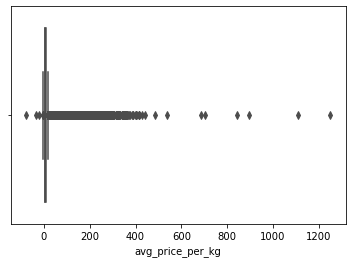

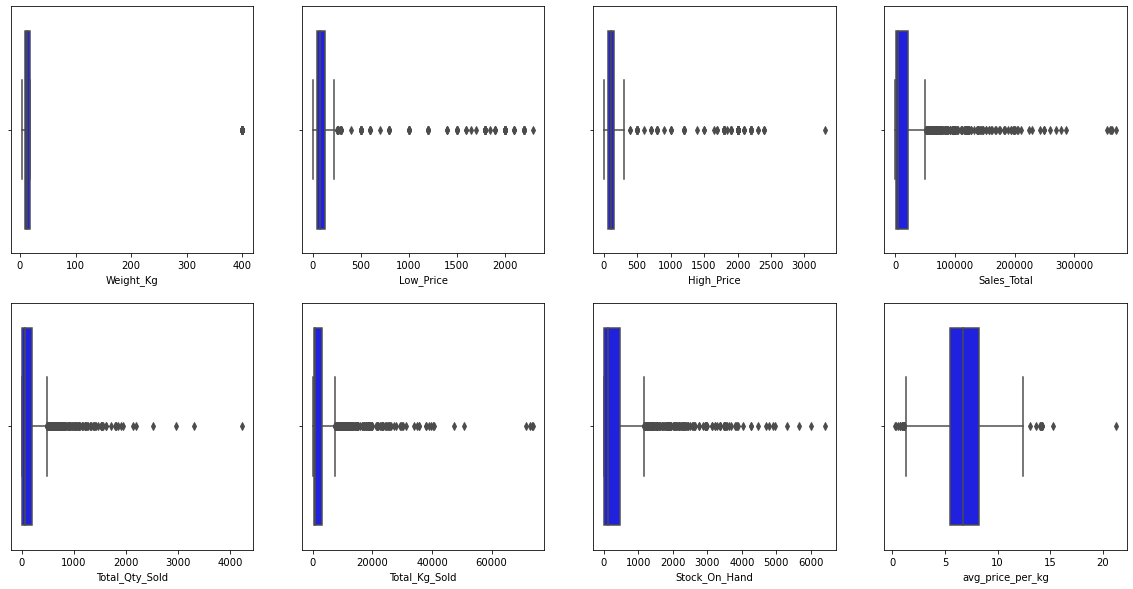

In [21]:
# use Histogram or Boxplot to see outliers and then remove
# create a list of all numerical features
sns.boxplot(x='avg_price_per_kg', data=df_train, color='Red');
fig, axes = plt.subplots(2, 4, figsize = (20, 10))
sns.boxplot(ax=axes[0,0], data = df2, x = 'Weight_Kg', color='blue')
sns.boxplot(ax=axes[0,1], data = df2, x = 'Low_Price', color='blue')
sns.boxplot(ax=axes[0,2], data = df2, x = 'High_Price', color='blue')
sns.boxplot(ax=axes[0,3], data = df2, x = 'Sales_Total', color='blue')
sns.boxplot(ax=axes[1,0], data = df2, x = 'Total_Qty_Sold', color='blue')
sns.boxplot(ax=axes[1,1], data = df2, x = 'Total_Kg_Sold', color='blue')
sns.boxplot(ax=axes[1,2], data = df2, x = 'Stock_On_Hand', color='blue')
sns.boxplot(ax=axes[1,3], data = df2, x = 'avg_price_per_kg', color='blue')
plt.show()

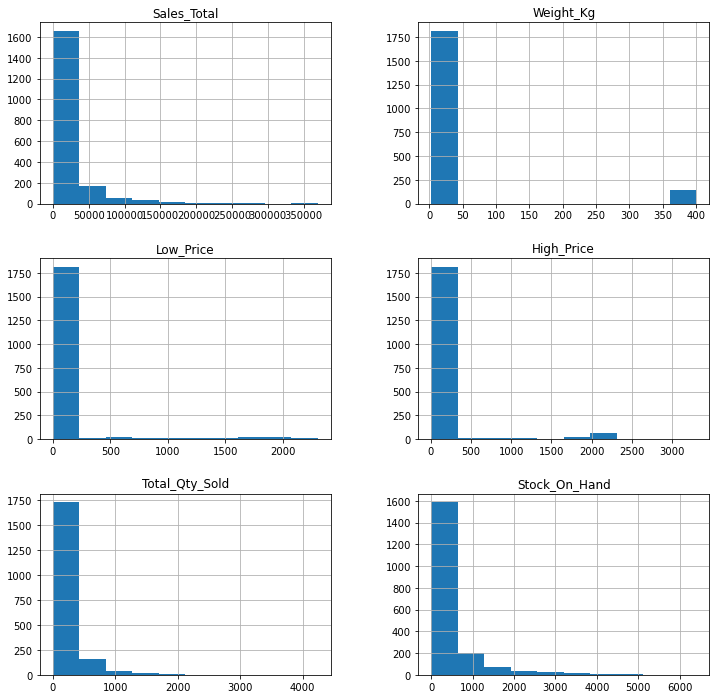

In [57]:
# create a list of all numerical features
features = ['Sales_Total','Weight_Kg','Low_Price', 'High_Price', 'Total_Qty_Sold', 'Stock_On_Hand'] 
df2[features].hist(figsize=(12,12));

Dealing with the outliers by removal would reduce the the Data entrie size and thus we could lose information. Outliers will be left as is as certain algorithm can deal with them. Great care has to be taken when removing outliers because the test data might contain these outliers and our models might not deal accordingly with such.

#### 4.4 Dealing with Inconsistancies

In [58]:
# Go through all the categorical features to look for inconsistancies.
# Inconsistancy would be an odd catagory that would not fall under certain feature.
df2["Province"].value_counts()

CAPE                    1045
W.CAPE-BERGRIVER ETC     440
EASTERN CAPE             206
WEST COAST               126
NATAL                    111
TRANSVAAL                 15
ORANGE FREE STATE          9
Name: Province, dtype: int64

In [59]:
df2["Container"].value_counts()

M4183    588
JE090    565
EC120    448
IA400    139
JG110     85
EF120     74
AC030     31
M6125     10
DT063      6
EG140      3
M9125      3
Name: Container, dtype: int64

In [60]:
df2["Size_Grade"].value_counts()

1S    532
1M    319
2S    308
2M    232
1L    225
1X    171
2L    120
2X     26
2U     17
1U      2
Name: Size_Grade, dtype: int64

In [61]:
df2["Commodities"].value_counts() 

APPLE GOLDEN DELICIOUS    1952
Name: Commodities, dtype: int64

No inconsistancies were observed in the data

# 5. Exploratory Data Analysis

### 5.1 Univaraite Data analysis

##### Univariate Analysis: Non-Graphical

##### Summary Statistics

In [62]:
# Numeric Stats
df2.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [63]:
# Catagotical Stats
df2.describe(include='O')

,Province,Container,Size_Grade,Commodities,Date
count,1952,1952,1952,1952,1952
unique,7,11,10,1,147
top,CAPE,M4183,1S,APPLE GOLDEN DELICIOUS,2020-07-20
freq,1045,588,532,1952,35


###### Checking skewness and Kurtosis

|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

In [64]:
df2.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

In [65]:
df2.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

##### Univariate Analysis: Graphical

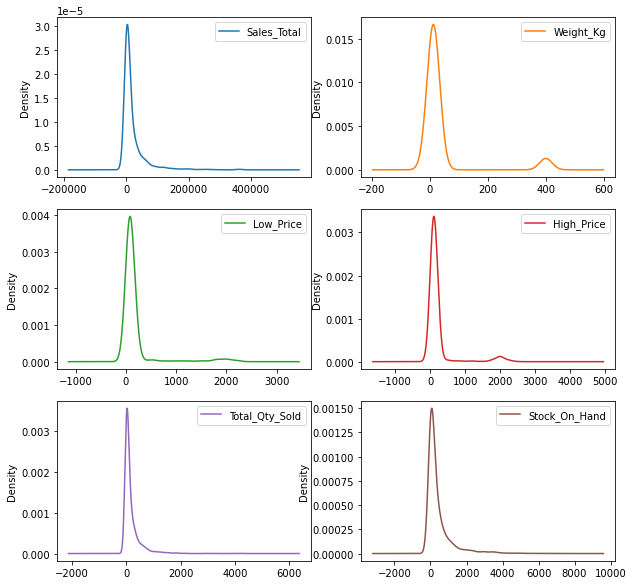

In [66]:
df2[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

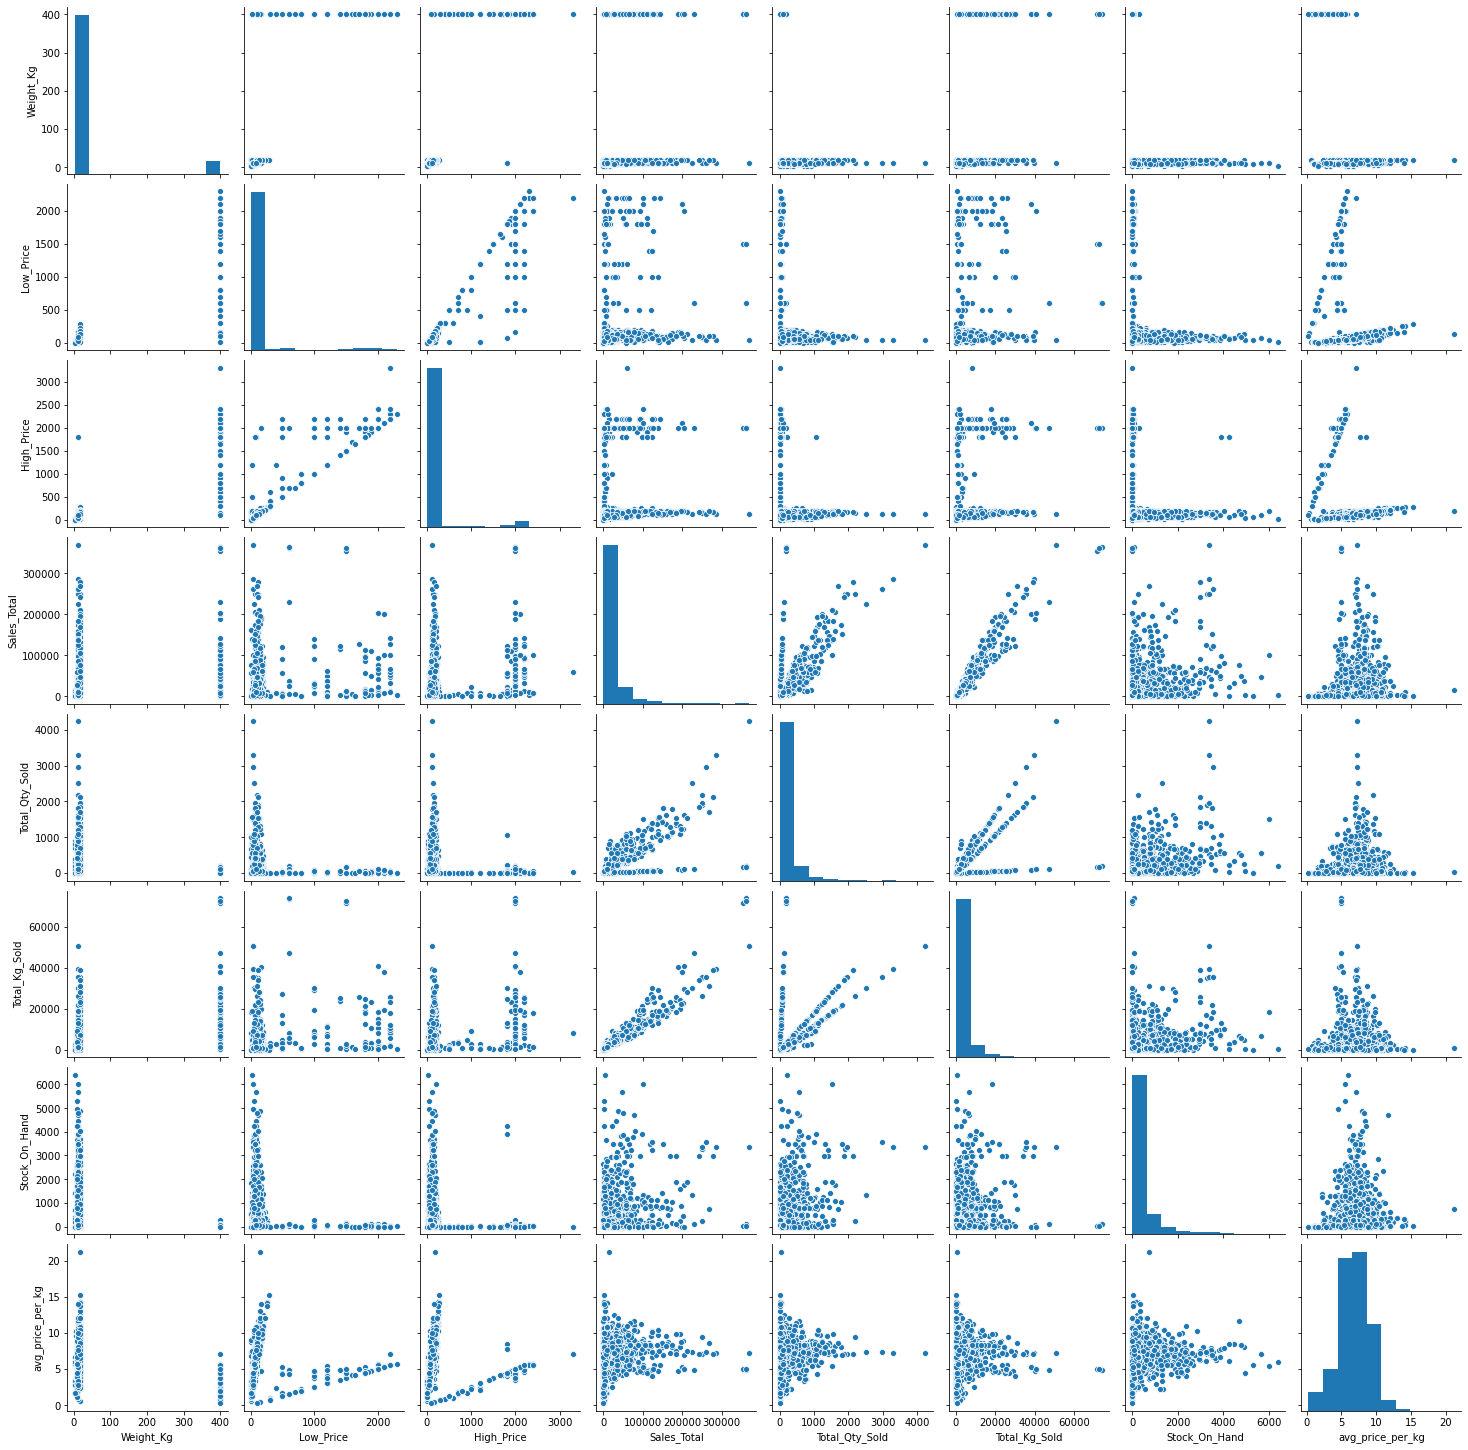

In [67]:
#using pair plot to understand the  distribution with each otherr
sns.pairplot(df2)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

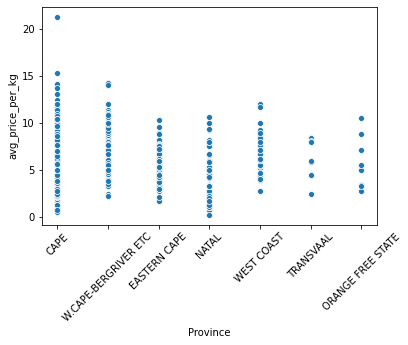

In [68]:
sns.scatterplot(x = 'Province',y = 'avg_price_per_kg', data = df2, palette="hls")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

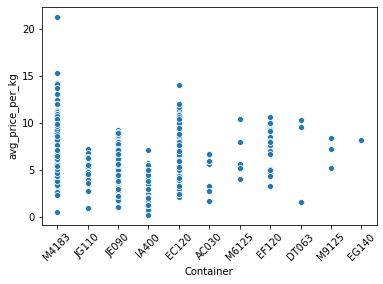

In [69]:
sns.scatterplot(x = 'Container',y = 'avg_price_per_kg', data = df2, palette="hls")
plt.xticks(rotation=45)

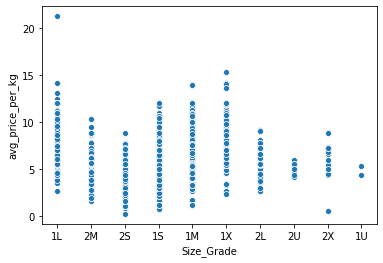

In [70]:
sns.scatterplot(x = 'Size_Grade',y = 'avg_price_per_kg', data = df2, palette="hls")

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

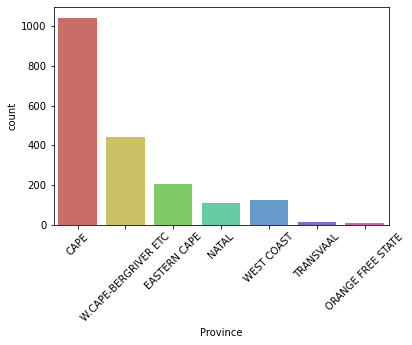

In [71]:
sns.countplot(x = 'Province', data = df2, palette="hls")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

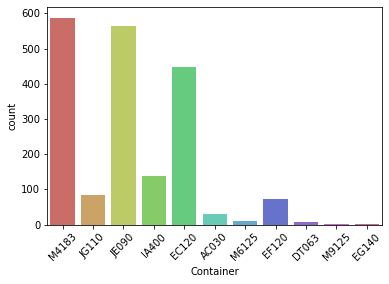

In [72]:
sns.countplot(x = 'Container', data = df2, palette="hls")
plt.xticks(rotation=45)

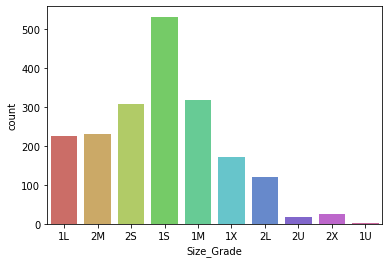

In [74]:
sns.countplot(x = 'Size_Grade', data = df2, palette="hls")

The countplots above clearly shows that the Catagorical Data values and thier respective counts . In the Commadities Variable, we see an filtered Golden Apples catagories as we ommited the other catagories as they would not neccesarily help in the prediction of the price of the apples. This is a very important insight and it will simplify the learnarity of the model.

Let us also look into the distribution of the Average Price and see where the Price is distributed. Our first assumption is that Average Price should be around the R6 price range  as that is where the distribution is Centred, to the middle of that renge.

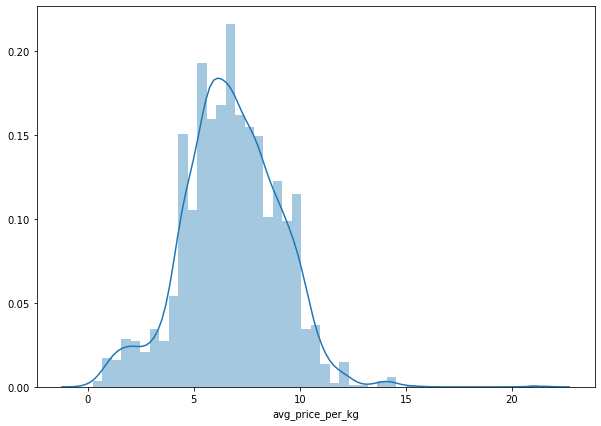

In [75]:
# Checking the distribution of the Price column
plt.subplots(figsize=(10,7))
sns.distplot(df2['avg_price_per_kg'],kde=True)

#### 5.2 Multivariate Data analysis

In [76]:
# check correlation with sales(research this). The ones(variables) with a high correlation we should select in below step.
df2.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


# 6. Feature Engineering and Selection

In [77]:
# here, we will create new variable that will help in the training and prediction process.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 278.0+ KB


The date column was in an object data type and we need the numerical aspect to continue with computations and create new columns from this.

## Date time Engineering

It's going to be hard to train our model using Date in its current format, let's split it down to
1.Year
2.month
3.Day

And drop the date 

In [24]:
# Converting the dates into Year , Month  and Day column
df2['Year'] = pd.DatetimeIndex(df2['Date']).year
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['Day'] = pd.DatetimeIndex(df2['Date']).day
df2.drop('Date', inplace=True, axis=1)

<ipython-input-24-749607d5c051>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = pd.DatetimeIndex(df2['Date']).year
<ipython-input-24-749607d5c051>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = pd.DatetimeIndex(df2['Date']).month
<ipython-input-24-749607d5c051>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Encode the Month Variable into the 4 Seasons:
The function classifies the days of the month to thier respective Quaterly seasons.

1= represents Summer, where month 12,1,2 are in included
2= represents Autunm, where month 3,4,5 are in included
3= represents Winter, where month 6,7,8 are included
4= represents Spring, where month 9,10,11 are included

In [25]:
def create_classes(Month):
        if Month==12 or Month<=2:  
            return 1  # Summer
        elif Month<=5:  
            return 2  # Autunm
        elif Month<=8:
            return 3  # Winter
        else:
            return 4  # Spring

In [26]:
df2['Season'] = df2['Month'].apply(create_classes)

<ipython-input-26-b70cd89fc4cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Season'] = df2['Month'].apply(create_classes)


<AxesSubplot:xlabel='Season', ylabel='avg_price_per_kg'>

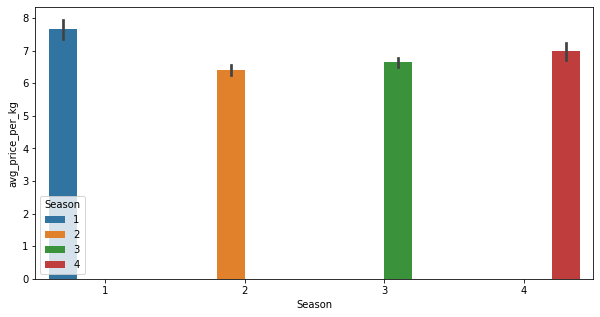

In [27]:
# Ploting the Season Column
plt.figure(figsize=(10,5))
sns.barplot(data = df2, x="Season", y="avg_price_per_kg", hue = "Season")

 It looks like apples are cheap in "Autumn and Winter" and expensive in "Summer and Spring" this is probably a result of supply exceeding demand.

<AxesSubplot:xlabel='Season', ylabel='Sales_Total'>

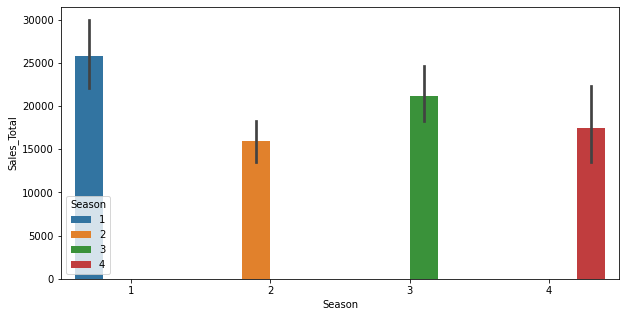

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(data = df2, x="Season", y='Sales_Total', hue = "Season")

It looks like there are many sales of the Golden Delicious Apples in Summer, which means the demand is higher in summer

## Variable Encoding

Since some of our features are in categorical/object form, we cannot yet feed the data into a machine learning algorithm, we need to encode them. We will employ One-hot encoder for that. One-hot encoding is one of the most common encoding methods in machine learning. This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column.

This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information.

OneHotEncoder is preferred over pandas get_dummies. The crux of it is that the sklearn encoder creates a function which persists and can then be applied to new data sets which use the same categorical variables, with consistent results.

In [82]:
# Transform string into Dummy
df_dummies = pd.get_dummies(df2,drop_first = True)

# Again we make sure that all the column names have underscores instead of periods,whitespaces and dashes
df_dummies.columns = [col.replace(".","_") for col in df_dummies.columns] 
df_dummies.columns = [col.replace(" ", "_")for col in df_dummies.columns]
df_dummies.columns = [col.replace("-", "_")for col in df_dummies.columns]

In [83]:
# Checking the New Dimension
df_dummies.shape

(1952, 37)

In [84]:
# Re-order my dependendent variable (avg_price_per_kg) to be the last column
column_titles = [col for col in df_dummies.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
df_dummies=df_dummies.reindex(columns=column_titles)

### Correlation Matrix of the encoded Data

In [85]:
df_dummies.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Year,Month,Day,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.019772,0.047613,0.016251,...,-0.046532,0.314679,-0.007124,-0.068923,-0.080647,-0.083726,-0.064374,-0.029488,-0.036183,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.021276,0.039084,-0.015764,...,-0.023629,0.288148,-0.008087,-0.025554,-0.084578,-0.104532,-0.102040,-0.032675,-0.038494,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.018911,0.047717,0.002058,...,-0.039365,0.331683,-0.007067,-0.030418,-0.092192,-0.118314,-0.118517,-0.035822,-0.042342,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.031264,-0.055853,-0.011699,...,-0.057071,0.285465,-0.012618,-0.075793,-0.105784,-0.109908,-0.132595,-0.040623,-0.046104,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.042132,-0.058639,-0.020402,...,-0.061837,0.202586,-0.012138,-0.100508,-0.085270,-0.037270,-0.027759,-0.032337,-0.033339,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,0.030462,-0.023098,0.003238,...,-0.076261,0.306478,-0.010024,-0.081291,-0.097158,-0.093815,-0.100862,-0.035961,-0.041667,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,-0.045846,-0.011749,0.081923,...,-0.028461,0.171355,-0.015715,-0.044300,-0.086927,-0.086702,-0.008891,-0.046085,-0.005271,0.105028
Year,-0.019772,-0.021276,-0.018911,0.031264,0.042132,0.030462,-0.045846,1.000000,-0.430853,-0.023257,...,-0.006856,0.012449,0.005800,0.004457,-0.014455,0.012357,0.030314,0.016977,-0.004439,-0.135526
Month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,-0.430853,1.000000,0.010012,...,-0.023882,0.035952,-0.007261,-0.064184,0.067404,0.012777,-0.022811,-0.047931,0.013578,0.005205
Day,0.016251,-0.015764,0.002058,-0.011699,-0.020402,0.003238,0.081923,-0.023257,0.010012,1.000000,...,-0.001329,0.028307,0.009691,-0.030633,0.014469,-0.029280,0.035713,0.019178,-0.026454,-0.071334


### Correlation heatmap

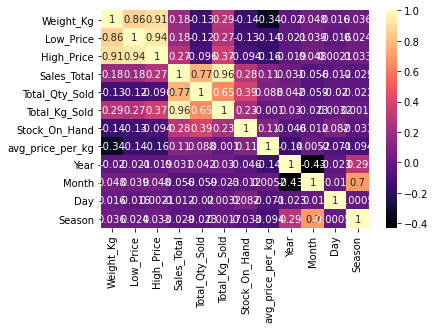

In [86]:
from statsmodels.graphics.correlation import plot_corr


#heatmap to understand the correlation with each other

sns.heatmap(df2.corr(),annot =True,cmap='magma')

# 7. Regression Models training 

# 7.1 Training the model on Non-Scaled Data

In [87]:
# isolating X and Y
y = df_dummies.avg_price_per_kg
X = df_dummies.iloc[:,:-1]

We will first split our data into a training and a testing set and import neccessary libraries

In [88]:
# Split the data into Train and Testing(validation set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

### Training the Multiple Linear Regression model on the Training set

In [89]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Test RMSE': test_rmse}
    
    return df

In [90]:
# Expressing and Fiting the Model
regressor = LinearRegression()
fit_and_evaluate(regressor,X_train,y_train)

{'Train RMSE': 1.368248589795874, 'Test RMSE': 1.4106367975206004}

### Training the Polynomial Regression model on the whole dataset

In [92]:
# Expressing and Fiting the Model
poly_reg = PolynomialFeatures(degree = 4, include_bias= False)
X_poly = poly_reg.fit(X_train)
X_poly2 = X_poly.transform(X_train)
# Creating and fiting a polynomial model
p_reg = LinearRegression().fit(X_poly2,y_train)
fit_and_evaluate(p_reg,X_poly2,y_train)

{'Train RMSE': 1.368248589795874, 'Test RMSE': 1.4106367975206004}

### Training the SVR model on the whole dataset

In [93]:
# Expressing and Fiting the Model
SVregressor = SVR(kernel = 'rbf')
fit_and_evaluate(SVregressor,X_train,y_train)

{'Train RMSE': 2.049501788147342, 'Test RMSE': 1.9697095829435856}

### Training the Decision Tree Regression model on the whole dataset

In [94]:
# Expressing and Fiting the Model
DTregressor = DecisionTreeRegressor(random_state = 0)
fit_and_evaluate(DTregressor,X_train,y_train)

{'Train RMSE': 9.285136201465196e-16, 'Test RMSE': 0.7555196717654362}

### Training the Random Forest Regression model on the whole dataset

In [95]:
# Expressing and Fiting the Model
RFregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
fit_and_evaluate(RFregressor,X_train,y_train)

{'Train RMSE': 0.2716285818595379, 'Test RMSE': 0.6103426692547749}

### Training Ridge and Lasso Regression

#### Ridge Regression

In [96]:
# Expressing and Fiting the Model
ridge = Ridge()
fit_and_evaluate(ridge,X_train,y_train)

{'Train RMSE': 1.3702285425520724, 'Test RMSE': 1.40804763119708}

#### Lasso Regression

In [97]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)
fit_and_evaluate(lasso,X_train,y_train)

{'Train RMSE': 1.4055743733573758, 'Test RMSE': 1.4243681864533768}

# 7.2 Training the model on Scaled Data 

We will use standardisation because it is robust to outlier values. Let's go ahead an apply standard scaling to our model. We'll import the StandardScalar() object from sklearn.preprocessing

In [100]:
# Expressing the function
scaler = StandardScaler()

In [103]:
X_train2 = X_train
X_test2 = X_test
y_train2 = y_train
y_test2 = y_test   

In [104]:
# Save standardized features into new variable
X_scaled_train = scaler.fit_transform(X_train)

In [105]:
X_scaled_test = scaler.transform(X_test)

### Linear Regression

In [106]:
fit_and_evaluate(regressor,X_train2,y_train2)

{'Train RMSE': 1.368248589795874, 'Test RMSE': 1.4106367975206004}

### SV Regressor

In [107]:
fit_and_evaluate(SVregressor,X_train2,y_train2)

{'Train RMSE': 2.049501788147342, 'Test RMSE': 1.9697095829435856}

### DT Regressor

In [108]:
fit_and_evaluate(DTregressor,X_train2,y_train2)

{'Train RMSE': 9.285136201465196e-16, 'Test RMSE': 0.7555196717654362}

### RF Regressor

In [109]:
fit_and_evaluate(RFregressor,X_train2,y_train2)

{'Train RMSE': 0.2716285818595379, 'Test RMSE': 0.6103426692547749}

### Rigde Regresion

In [110]:
fit_and_evaluate(ridge,X_train2,y_train2)

{'Train RMSE': 1.3702285425520724, 'Test RMSE': 1.40804763119708}

### Lasso Regression

In [111]:
fit_and_evaluate(lasso,X_train2,y_train2)

{'Train RMSE': 1.4055743733573758, 'Test RMSE': 1.4243681864533768}

### XG Boosting

###  Feature Importance in Gradient Boosting

#### Build the model from XGboost first

In [112]:
# fit model  training data
model = XGBRegressor()
model.fit(X,y)
# feature importance
print(model.feature_importances_)

[4.25230891e-01 2.32058331e-01 1.79513887e-01 1.86466668e-02
 5.72292274e-03 7.56704155e-03 4.89503564e-03 1.66104510e-02
 4.26804787e-03 3.96712497e-03 1.37410369e-02 6.35770569e-03
 2.57471646e-03 1.01389107e-03 4.73447581e-04 7.47007597e-03
 4.44096420e-03 0.00000000e+00 1.80370491e-02 2.11804081e-03
 1.12835056e-04 0.00000000e+00 6.94842893e-04 6.88716886e-04
 9.42700449e-03 1.66126550e-03 0.00000000e+00 2.85588764e-03
 4.42510750e-03 1.19511771e-03 8.61597527e-03 2.09793146e-03
 6.43022475e-04 1.02664027e-02 1.71589176e-03 8.92663200e-04]


This would result in an array. So we can sort it with descending

In [113]:
sorted_idx = np.argsort(model.feature_importances_)[::-1]

In [114]:
for index in sorted_idx:
    print([X_train.columns[index], model.feature_importances_[index]])

['Weight_Kg', 0.4252309]
['Low_Price', 0.23205833]
['High_Price', 0.17951389]
['Sales_Total', 0.018646667]
['Container_EC120', 0.01803705]
['Year', 0.016610451]
['Season', 0.013741037]
['Size_Grade_2S', 0.010266403]
['Container_M4183', 0.0094270045]
['Size_Grade_1X', 0.008615975]
['Total_Kg_Sold', 0.0075670416]
['Province_W_CAPE_BERGRIVER_ETC', 0.007470076]
['Province_EASTERN_CAPE', 0.0063577057]
['Total_Qty_Sold', 0.0057229227]
['Stock_On_Hand', 0.0048950356]
['Province_WEST_COAST', 0.004440964]
['Size_Grade_1S', 0.0044251075]
['Month', 0.004268048]
['Day', 0.003967125]
['Size_Grade_1M', 0.0028558876]
['Province_NATAL', 0.0025747165]
['Container_EF120', 0.0021180408]
['Size_Grade_2L', 0.0020979315]
['Size_Grade_2U', 0.0017158918]
['Container_M6125', 0.0016612655]
['Size_Grade_1U', 0.0011951177]
['Province_ORANGE_FREE_STATE', 0.0010138911]
['Size_Grade_2X', 0.0008926632]
['Container_JE090', 0.0006948429]
['Container_JG110', 0.0006887169]
['Size_Grade_2M', 0.0006430225]
['Province_TRANS

Then, it is time to print all sorted importances and the name of columns together as lists.
Furthermore, we can plot the importances with XGboost built-in function

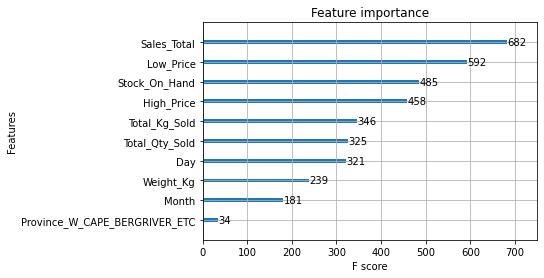

In [115]:
plot_importance(model, max_num_features = 10)
plt.show()

In [116]:
#initialize ensemble with a single model
# fit in new models to the ensemble
my_model = XGBRegressor(max_depth=2,min_child_weight=13,subsample=1,colsample_bytree=1,
            objective='reg:squarederror',n_estimators=6000, learning_rate=0.3, random_state= 42)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)],
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=2,
             min_child_weight=13, missing=nan, monotone_constraints='()',
             n_estimators=6000, n_jobs=12, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
fit_and_evaluate(my_model,X_train,y_train)

{'Train RMSE': 0.03878648187646677, 'Test RMSE': 0.3288523457034421}

In [118]:
# generate prediction with the single model ensemble
predictions = my_model.predict(X_test)
print("RMSE: " + str(math.sqrt(mean_squared_error(predictions, y_test))))

RMSE: 0.3288523457034421


**Metrics used**
  - Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

## Making prediction on the Test-set

In [152]:
df_test

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...
680,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-05-26,30.0,30.0,1320.0,44,396.0,856
681,CAPE,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-01-10,50.0,132.0,6290.0,52,624.0,785
682,W.CAPE-BERGRIVER ETC,JE090,2X,9.0,APPLE GOLDEN DELICIOUS,2020-06-03,55.0,55.0,220.0,4,36.0,170
683,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-02-22,120.0,150.0,27840.0,202,3696.6,0


In [153]:
# Converting the dates into Year , Month  and Day column
df_test['Year'] = pd.DatetimeIndex(df_test['Date']).year
df_test['Month'] = pd.DatetimeIndex(df_test['Date']).month
df_test['Day'] = pd.DatetimeIndex(df_test['Date']).day
df_test.drop('Date', inplace=True, axis=1)


In [154]:
df_test['Season'] = df_test['Month'].apply(create_classes)

In [155]:
X_real = pd.get_dummies(df_test, drop_first = True)
# Again we make sure that all the column names have underscores instead of periods,whitespaces and dashes
X_real.columns = [col.replace(".","_") for col in X_real.columns] 
X_real.columns = [col.replace(" ", "_")for col in X_real.columns]
X_real.columns = [col.replace("-", "_")for col in X_real.columns]
X_real.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Year,Month,Day,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,12.0,128.0,136.0,5008.0,38,456.0,0,2020,7,9,...,0,1,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,2020,1,20,...,0,0,0,0,1,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,2020,8,19,...,0,0,1,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,2020,5,6,...,0,1,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,2020,5,4,...,0,0,0,0,0,0,0,0,0,0


In [156]:
X_real

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Year,Month,Day,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,12.0,128.0,136.0,5008.0,38,456.0,0,2020,7,9,...,0,1,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,2020,1,20,...,0,0,0,0,1,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,2020,8,19,...,0,0,1,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,2020,5,6,...,0,1,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,2020,5,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,9.0,30.0,30.0,1320.0,44,396.0,856,2020,5,26,...,0,0,0,0,0,0,0,1,0,0
681,12.0,50.0,132.0,6290.0,52,624.0,785,2020,1,10,...,0,1,0,0,0,0,0,0,0,0
682,9.0,55.0,55.0,220.0,4,36.0,170,2020,6,3,...,0,0,0,0,0,0,0,0,0,1
683,18.3,120.0,150.0,27840.0,202,3696.6,0,2020,2,22,...,0,0,1,0,0,0,0,0,0,0


In [157]:
X_real.columns

Index(['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Year', 'Month', 'Day', 'Season',
       'Province_EASTERN_CAPE', 'Province_NATAL', 'Province_ORANGE_FREE_STATE',
       'Province_TRANSVAAL', 'Province_W_CAPE_BERGRIVER_ETC',
       'Province_WEST_COAST', 'Container_DT063', 'Container_EC120',
       'Container_EF120', 'Container_EG140', 'Container_IA400',
       'Container_JE090', 'Container_JG110', 'Container_M4183',
       'Container_M6125', 'Container_M9125', 'Size_Grade_1M', 'Size_Grade_1S',
       'Size_Grade_1U', 'Size_Grade_1X', 'Size_Grade_2L', 'Size_Grade_2M',
       'Size_Grade_2S', 'Size_Grade_2U', 'Size_Grade_2X'],
      dtype='object')

In [159]:
my_model = XGBRegressor(max_depth=2,min_child_weight=13,subsample=1,colsample_bytree=1,
            objective='reg:squarederror',n_estimators=6000, learning_rate=0.3, random_state= 42)
my_model.fit(df_dummies[['Total_Kg_Sold','Low_Price', 'Day', 'Month', 'Season','Weight_Kg', 'Total_Qty_Sold',
'High_Price','Sales_Total', 'Stock_On_Hand']],df_dummies['avg_price_per_kg'])

preds = my_model.predict(X_real[['Total_Kg_Sold','Low_Price', 'Day', 'Month', 'Season','Weight_Kg', 'Total_Qty_Sold',
'High_Price','Sales_Total', 'Stock_On_Hand']])
       
preds[0:5]

array([11.051709 , 12.256421 ,  9.951637 ,  8.8760395,  7.661893 ],
      dtype=float32)

# 9. Submission

In [160]:
# create a submission dataframe
submission = pd.DataFrame(
          {'Index' : test_id,
            'Avg_Price_Per_Kg': preds
           })

In [161]:
submission.head()

,Index,Avg_Price_Per_Kg
0,1,11.051709
1,2,12.256421
2,3,9.951637
3,4,8.876040
4,5,7.661893


In [162]:
# save DataFrame to csv file for submission
submission.to_csv("full set.csv", index=False)

In [163]:
#storing model
pkl_file = "mlr_model.pkl"
with open (pkl_file, 'wb') as file:
    pickle.dump(model,file)

# 10. Bibliography

[1] https://www.kaggle.com/c/edsa-apple-prices-challenge